In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install pandas
! pip install openpyxl
! pip install matplotlib
! pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# 讀取上傳的資料檔案
train = pd.read_csv('/content/drive/MyDrive/train.csv')

# 檢視前幾列與欄位資訊
train_info = train.info()

train_head = train.head()

train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


(165034, 14)

In [ ]:
train.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
train_colums = train.columns
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
cat_cols = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
num_cols = ['CreditScore', 'Age','Balance','EstimatedSalary']
target = ['exited']
features = num_cols + cat_cols

# 視覺化圖表


In [ ]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

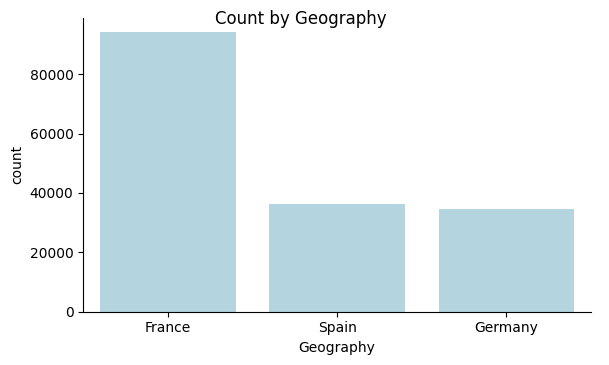

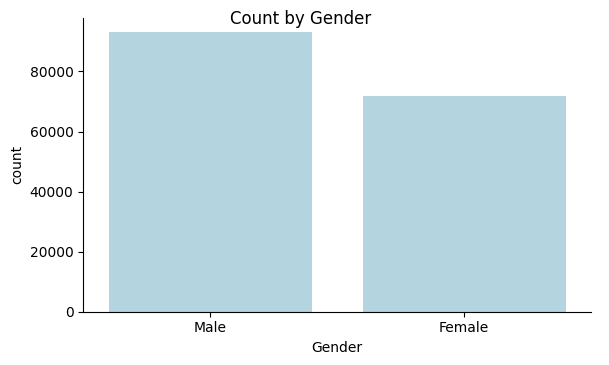

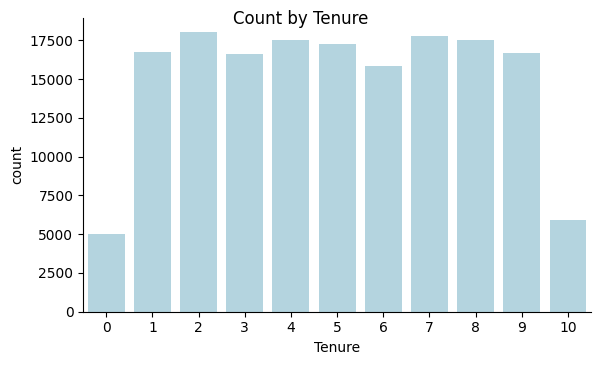

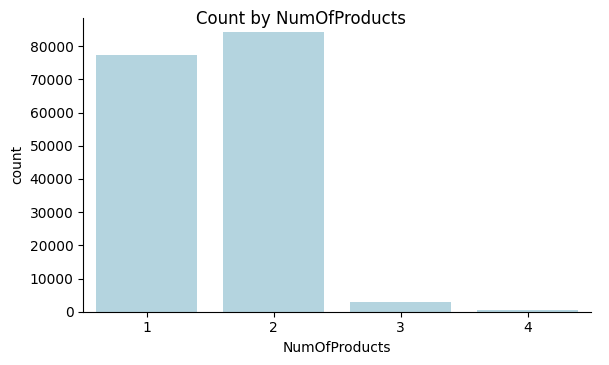

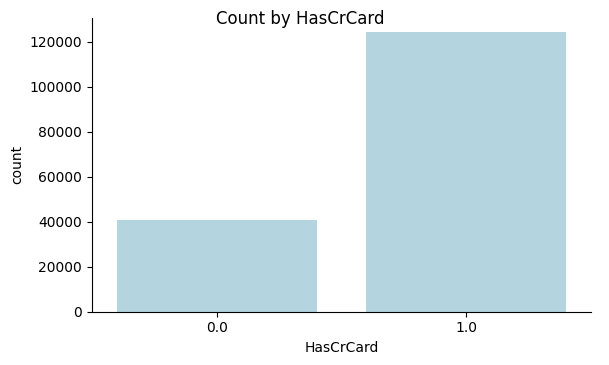

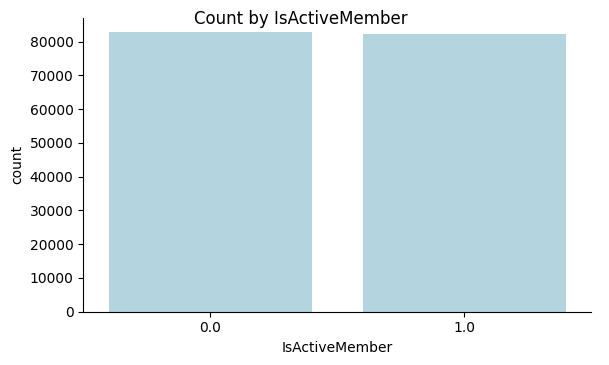

In [ ]:
cat_cols = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in cat_cols:
    g = sns.catplot(data=train, x=col, kind="count", height=4, aspect=1.5,color='lightblue')
    g.fig.suptitle(f'Count by {col}', y=0.9)  # 設定標題並稍微上移避免重疊
    plt.tight_layout()
    plt.show()

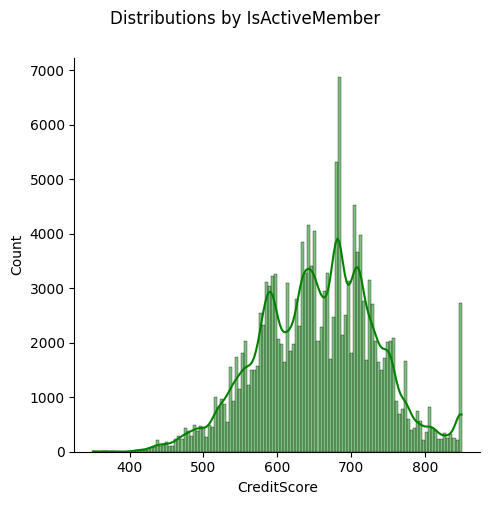

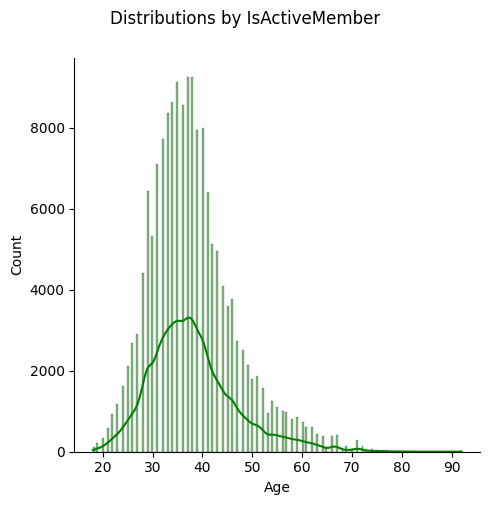

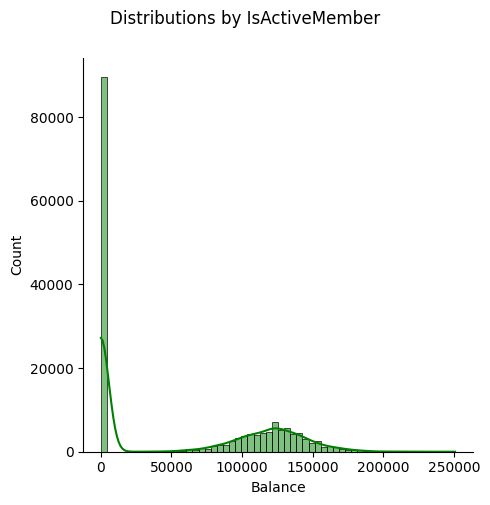

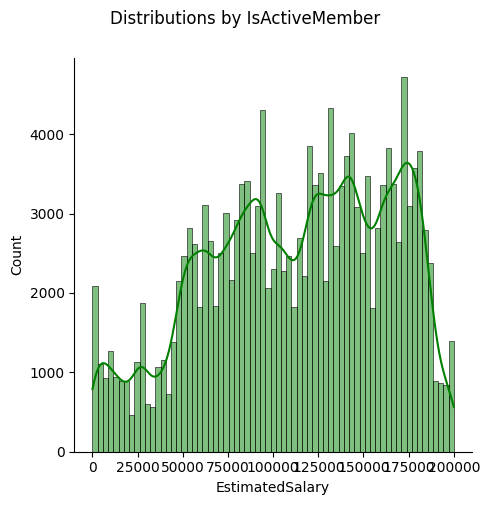

In [ ]:
num_cols = ['CreditScore', 'Age','Balance','EstimatedSalary']
for num in num_cols:
    r = sns.displot(train, x=num, kde=True, color='green')
    r.fig.suptitle(f'Distributions by {col}', y=1)  # 設定標題並稍微上移避免重疊
    plt.tight_layout()
    plt.show()

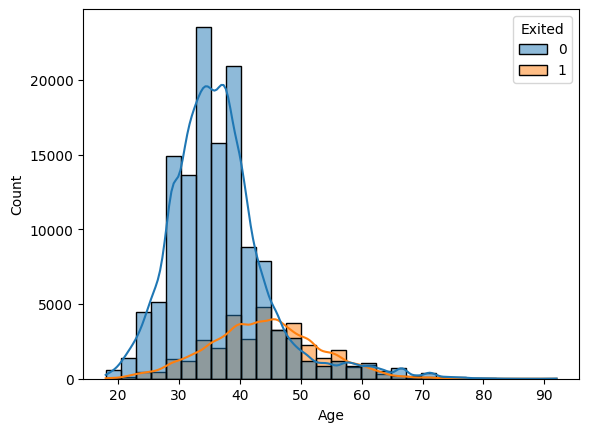

In [ ]:
# 流失客戶年齡分布差異

sns.histplot(data=train, x='Age', hue='Exited', bins=30, kde=True)
plt.show()

# 年齡越大,顧客越容易流失,40歲以上客戶的流失比例明顯提高,尤其在50歲以上族群中尤為明顯,顯示中老年客戶流失風險較高

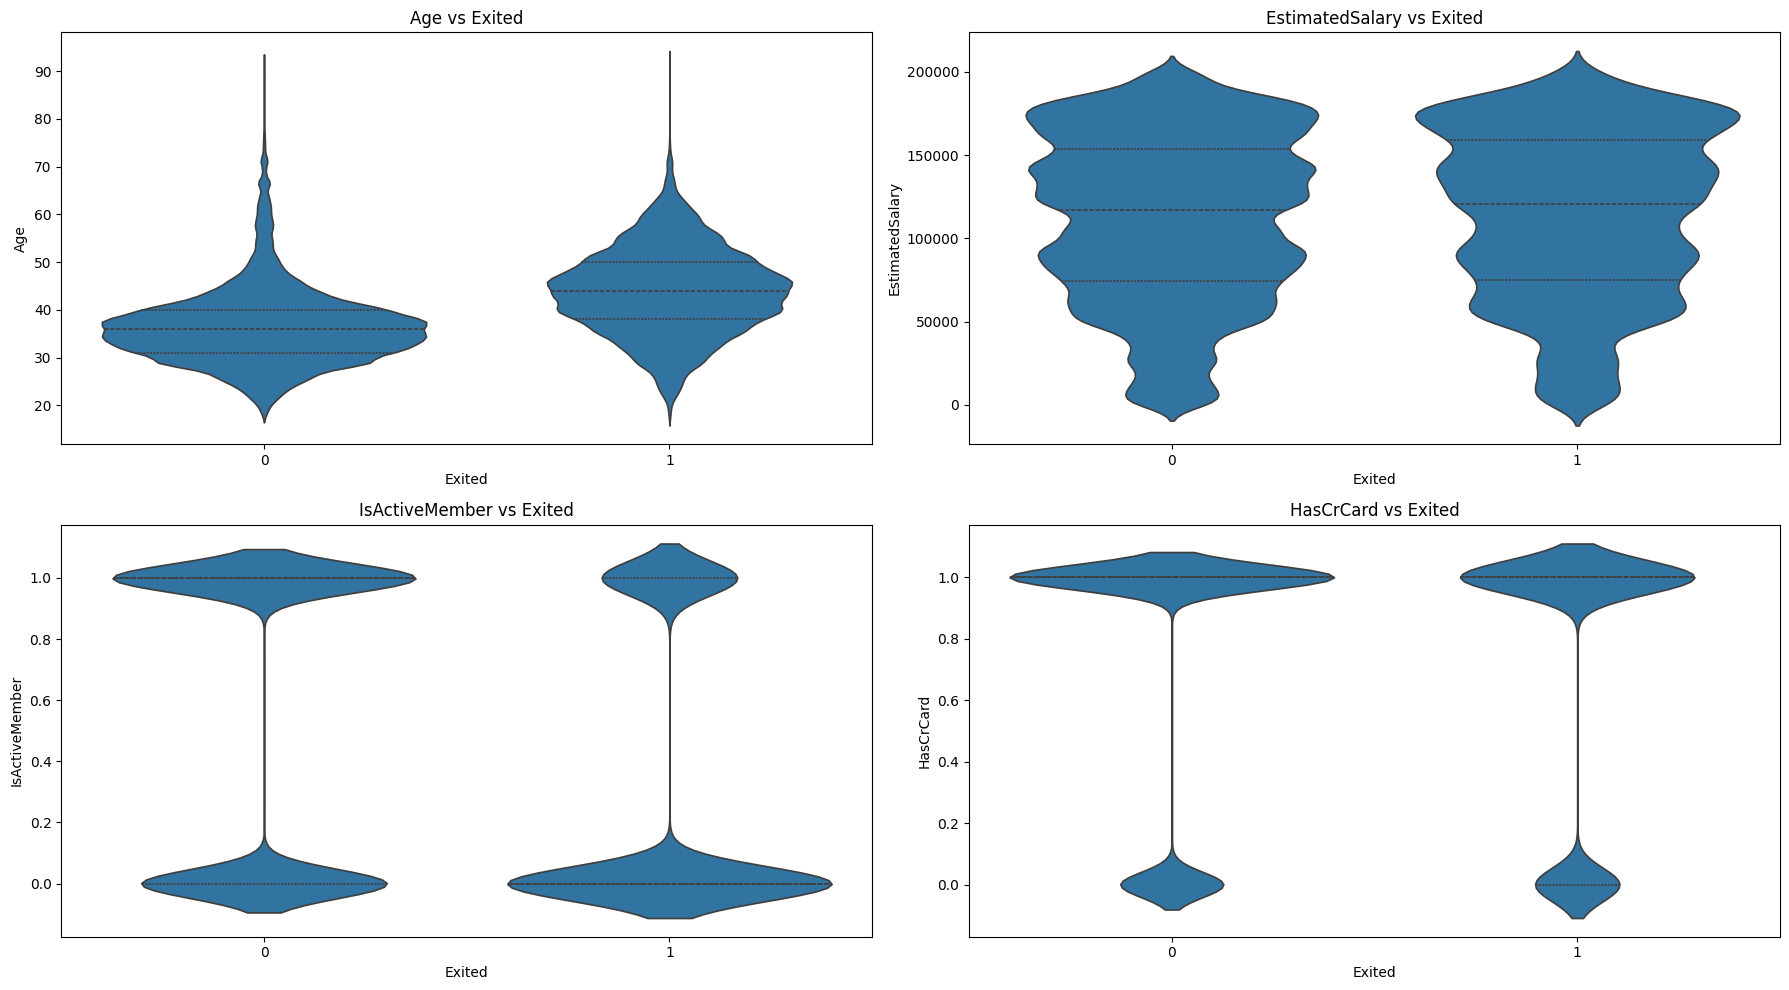

In [ ]:
fftt = [
    'Age', 'EstimatedSalary', "IsActiveMember", "HasCrCard"
]
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

for i, col in enumerate(fftt):
    ax = axes[i // 2, i % 2]
    sns.violinplot(data=train, x="Exited", y=col, ax=ax, inner="quartile")
    ax.set_title(f"{col} vs Exited")

plt.tight_layout()
plt.show()

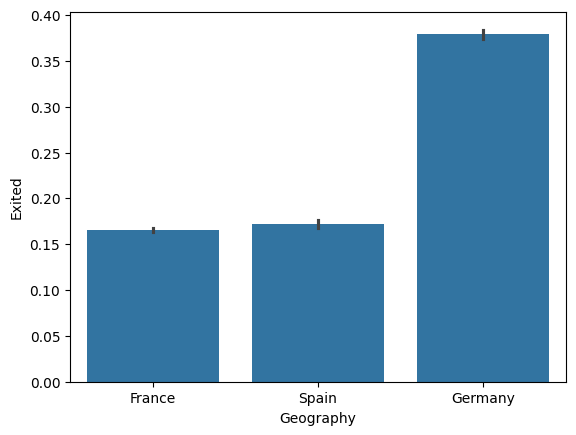

In [ ]:
# 不同國籍的流失比例

sns.barplot(data=train, x='Geography', y='Exited')
plt.show()

# 德國顧客的流失率遠高於其他國籍,法國顧客流失率相較來得低,可能與地區政策、服務品質有關,後續須了解各區顧客的實際需求

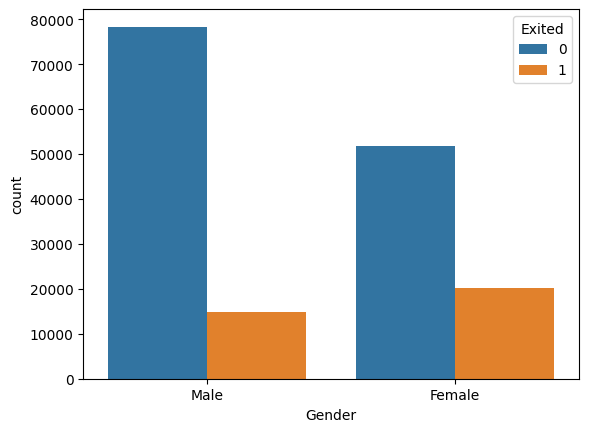

In [ ]:
# 性別與流失關聯

sns.countplot(data=train, x='Gender', hue='Exited')
plt.show()

# 性別與顧客流失率無顯著差異，代表性別不構成明確的預測因子

<Axes: xlabel='NumOfProducts', ylabel='count'>

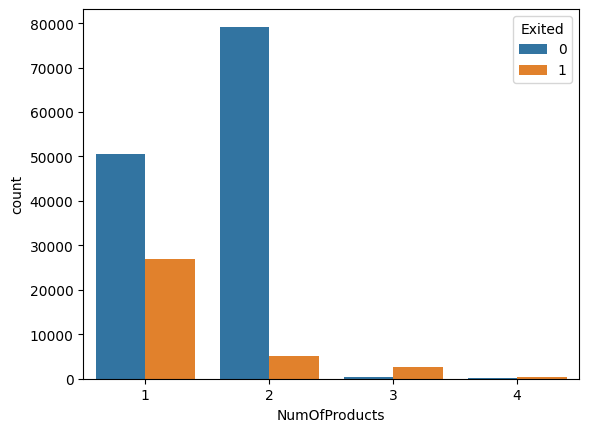

In [ ]:
# 產品數量與流失關係

sns.countplot(data=train, x='NumOfProducts', hue='Exited')

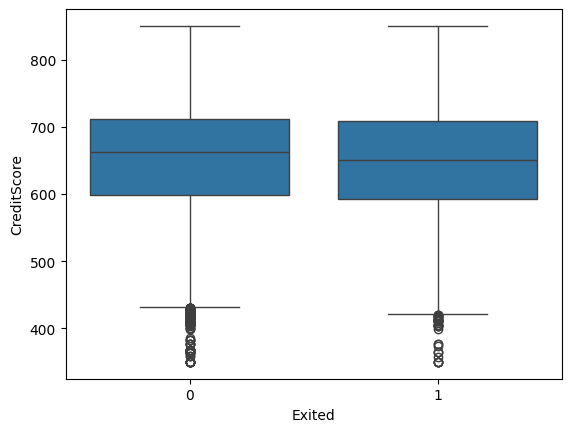

In [ ]:
# 信用分數與流失的散佈圖
sns.boxplot(data=train, x='Exited', y='CreditScore')
plt.show()


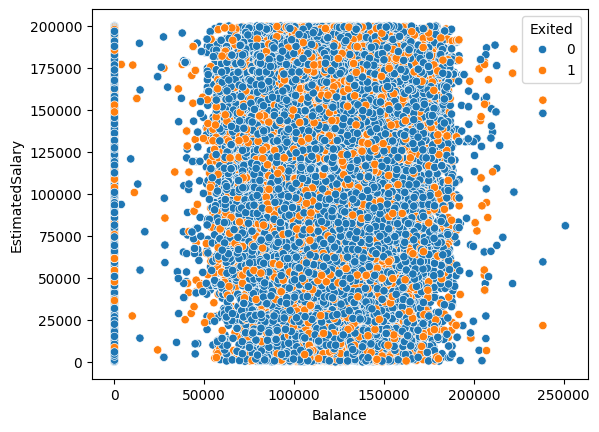

In [ ]:
# 帳戶餘額與預估薪資關係（按流失區分）
sns.scatterplot(data=train, x='Balance', y='EstimatedSalary', hue='Exited')
plt.show()


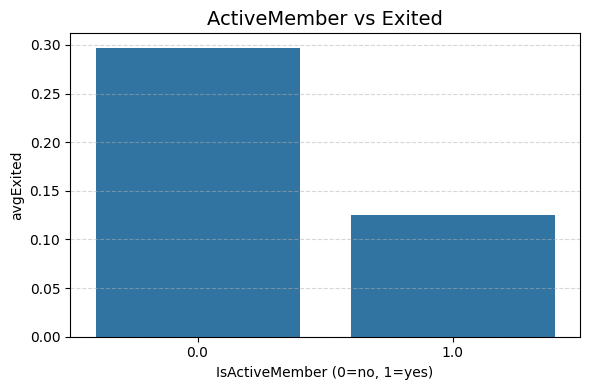

In [ ]:
# 活躍會員與非活躍會員的流失比較
plt.figure(figsize=(6, 4))
sns.barplot(data=train, x='IsActiveMember', y='Exited', ci=None)
plt.title('ActiveMember vs Exited', fontsize=14)
plt.xlabel('IsActiveMember (0=no, 1=yes)')
plt.ylabel('avgExited')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


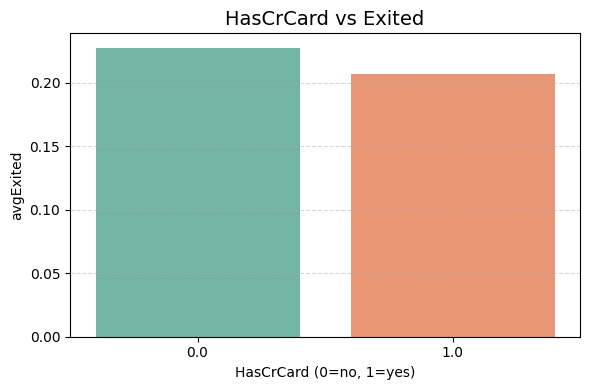

In [ ]:
# 擁有信用卡與否是否與流失有關
plt.figure(figsize=(6, 4))
sns.barplot(data=train, x='HasCrCard', y='Exited', ci=None, palette='Set2')
plt.title('HasCrCard vs Exited', fontsize=14)
plt.xlabel('HasCrCard (0=no, 1=yes)')
plt.ylabel('avgExited')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


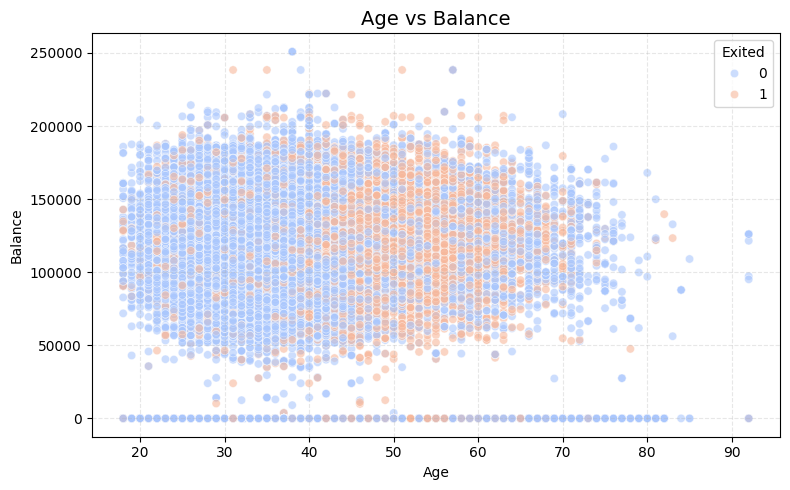

In [ ]:
# 年齡與帳戶餘額的關係（觀察可能的客群群聚）
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train, x='Age', y='Balance', hue='Exited', palette='coolwarm', alpha=0.6)
plt.title('Age vs Balance', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


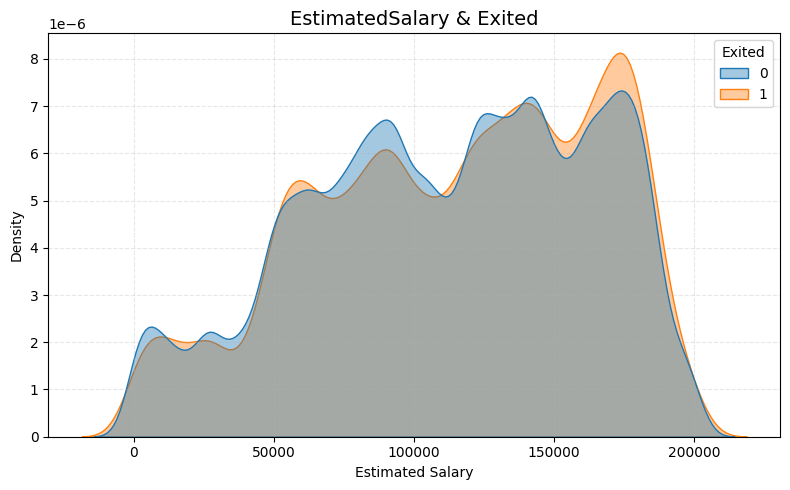

In [ ]:
# 預估薪資分布與流失率的關聯（分群探討）
plt.figure(figsize=(8, 5))
sns.kdeplot(data=train, x='EstimatedSalary', hue='Exited', fill=True, common_norm=False, alpha=0.4)
plt.title('EstimatedSalary & Exited', fontsize=14)
plt.xlabel('Estimated Salary')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


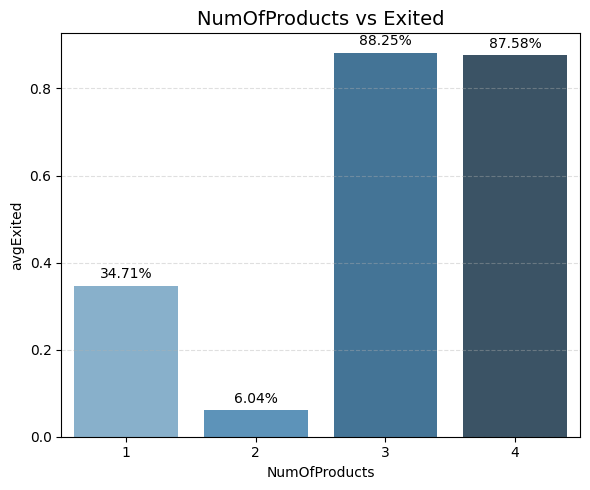

In [ ]:
# 每種產品數量下的流失比例（直條 + 百分比標籤）
# 計算百分比
product_churn = train.groupby('NumOfProducts')['Exited'].mean().reset_index()

plt.figure(figsize=(6, 5))
ax = sns.barplot(data=product_churn, x='NumOfProducts', y='Exited', palette='Blues_d')
plt.title('NumOfProducts vs Exited', fontsize=14)
plt.xlabel('NumOfProducts')
plt.ylabel('avgExited')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 加上標籤
for i, row in product_churn.iterrows():
    ax.text(i, row['Exited'] + 0.01, f"{row['Exited']:.2%}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# 將 Age 分成 5 個等寬區間（bin），並建立 AgeBin 欄位
import pandas as pd

# 定義年齡區間邊界與標籤名稱
bins = [17, 30, 40, 50, 60, 92]  # 包含最小年齡，92 為最大
labels = ['18-30', '31-40', '41-50', '51-60', '61-92']

# 使用 pd.cut 建立 AgeBGroup 欄位
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# 查看每個分組人數與平均流失率
print(train.groupby('AgeGroup')['Exited'].agg(['count', 'mean']))


          count      mean
AgeGroup                 
18-30     28869  0.082649
31-40     83914  0.120385
41-50     37124  0.388132
51-60     11111  0.608586
61-92      4016  0.314243


In [ ]:
# 是否為高資產用戶（布林值或0/1） 假設 Balance 超過 100,000 為高資產
train['HighBalance'] = train['Balance'].apply(lambda x: 1 if x > 100000 else 0)


In [ ]:
# 根據 NumOfProducts 建立產品分類
def categorize_products(n):
    if n == 1:
        return 'Single'
    elif n == 2:
        return 'Standard'
    elif n >= 3:
        return 'Multi'
    else:
        return 'Unknown'

train['ProductCategory'] = train['NumOfProducts'].apply(categorize_products)


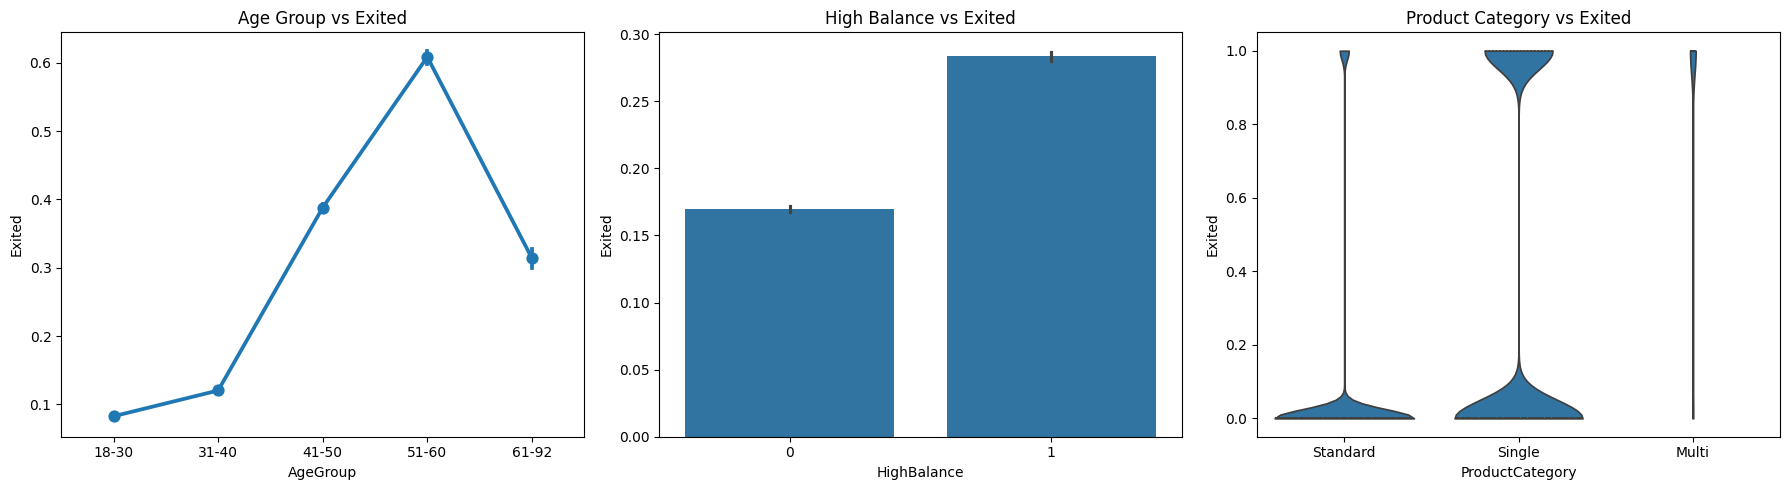

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# AgeGroup
sns.pointplot(data=train, x="AgeGroup", y="Exited", ax=axes[0])
axes[0].set_title("Age Group vs Exited")

# HighBalance
sns.barplot(data=train, x="HighBalance", y="Exited", ax=axes[1])
axes[1].set_title("High Balance vs Exited")

# ProductCategory
sns.violinplot(data=train, x="ProductCategory", y="Exited", ax=axes[2], inner="quartile", scale="count", cut=0)
axes[2].set_title("Product Category vs Exited")

plt.tight_layout()
plt.show()


In [ ]:
# 資產與收入的比值 若薪資為 0 時會導致除以 0 錯誤，故需處理
# 衡量客戶資產（Balance）與收入（EstimatedSalary）之間的比例關係，可以反映理財能力或穩定性，有助於辨識潛在流失風險。
train['BalanceSalaryRatio'] = train.apply(
    lambda row: row['Balance'] / row['EstimatedSalary'] if row['EstimatedSalary'] != 0 else 0,
    axis=1
)


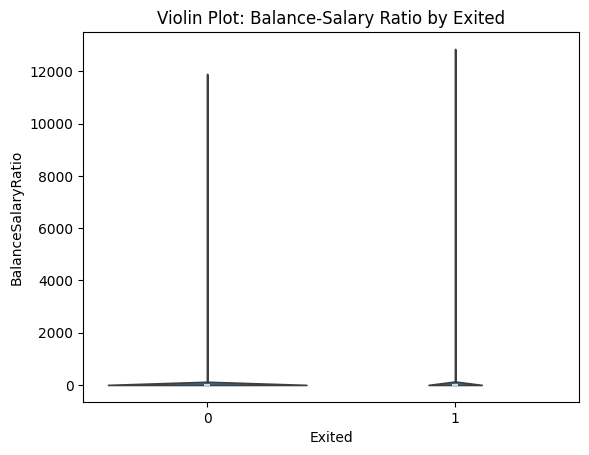

In [ ]:
# BalanceSalaryRatio：資產與收入的比值

sns.violinplot(data=train, x="Exited", y="BalanceSalaryRatio", scale="count", cut=0)
plt.title("Violin Plot: Balance-Salary Ratio by Exited")
plt.show()


In [ ]:
# 根據客戶在行內年資分層（e.g. 0–2年、3–5年、6+）
def tenure_group(years):
    if years <= 2:
        return 'New'
    elif years <= 5:
        return 'Mid'
    else:
        return 'Loyal'

train['TenureGroup'] = train['Tenure'].apply(tenure_group)


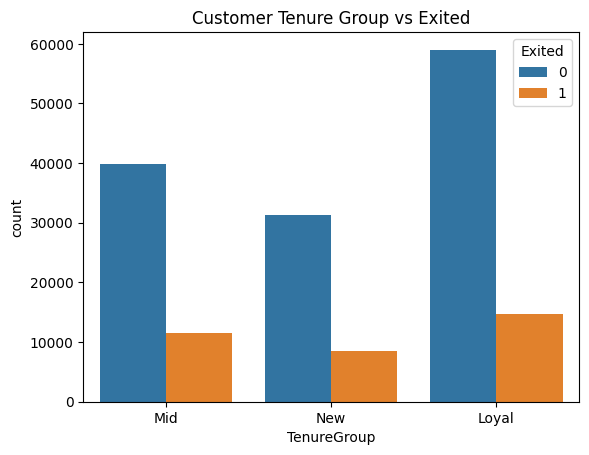

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train, x='TenureGroup', hue='Exited')
plt.title("Customer Tenure Group vs Exited")
plt.show()


In [ ]:
train.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,AgeBin,AgeGroup,HighBalance,ProductCategory,BalanceSalaryRatio,TenureGroup,RatioGroup
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,0.0,181449.97,0,31-40,31-40,0,Standard,0.000000,Mid,NaN
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,1.0,49503.50,0,31-40,31-40,0,Standard,0.000000,New,NaN
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,0.0,184866.69,0,31-40,31-40,0,Standard,0.000000,Loyal,NaN
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,1.0,84560.88,0,31-40,31-40,1,Single,1.760655,New,Medium
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,1.0,15068.83,0,31-40,31-40,0,Standard,0.000000,Mid,NaN
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,...,0.0,136024.31,1,31-40,31-40,1,Single,0.968787,Mid,Low
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,...,0.0,29792.11,0,18-30,18-30,1,Single,4.859431,Loyal,High
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,...,0.0,106851.60,0,31-40,31-40,1,Single,1.295969,New,Medium
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,...,0.0,142917.13,0,41-50,41-50,0,Standard,0.000000,Mid,NaN
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,...,1.0,170843.07,0,31-40,31-40,0,Single,0.475725,Mid,Very Low


In [ ]:
train.drop(columns=['AgeBin'])

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,HighBalance,ProductCategory,BalanceSalaryRatio,TenureGroup,RatioGroup
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,31-40,0,Standard,0.000000,Mid,NaN
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,31-40,0,Standard,0.000000,New,NaN
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,31-40,0,Standard,0.000000,Loyal,NaN
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,31-40,1,Single,1.760655,New,Medium
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,31-40,0,Standard,0.000000,Mid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0,31-40,0,Single,0.000000,New,NaN
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0,31-40,0,Single,0.000000,Mid,NaN
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0,31-40,0,Single,0.000000,Mid,NaN
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0,18-30,1,Single,2.269582,Loyal,High


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False 表示結果是密集矩陣
one_hot_encoded = encoder.fit_transform(train[['Geography','Gender']]) #<-注意 這邊要兩層 [],因為OneHotEncoder只能接受二維的資料
one_hot_encoded

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [ ]:
# 對應的類別名稱
encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
# 將資料存回data
train['France'] = one_hot_encoded[:,0]
train['Germany'] = one_hot_encoded[:,1]
train['Spain'] = one_hot_encoded[:,2]
train[['France', 'Germany', 'Spain']]

train['Female'] = one_hot_encoded[:,0]
train['Male'] = one_hot_encoded[:,1]
train[['Female', 'Male']]

,Female,Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
165029,0.0,0.0
165030,1.0,0.0
165031,1.0,0.0
165032,0.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse_output=False)  # sparse=False 表示結果是密集矩陣
one_hot_encoded = encoder.fit_transform(train[['Geography','Gender']]) #<-注意 這邊要兩層 [],因為OneHotEncoder只能接受二維的資料
one_hot_encoded

# 寫成 function
def one_hot_encode2(train, field_name):
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(train[[field_name]]).astype('int64')
    field_value = train[field_name].value_counts().index
    new_field_name = []
    for value, n in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
        fn = field_name+"_"+value
        train[fn] = one_hot_encoded[:,n]
        new_field_name.append(fn)
    return new_field_name

fns = one_hot_encode2(train, 'Geography')
fns += one_hot_encode2(train, 'Gender')
train[fns]

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
165029,0,0,1,1,0
165030,1,0,0,0,1
165031,1,0,0,0,1
165032,0,0,1,1,0


In [ ]:
train.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,France,Germany,Spain,Female,Male,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,...,0.0,1.0,0.0,0.0,1.0,0,1,0,0,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,...,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0,1
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,...,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,...,0.0,1.0,0.0,0.0,1.0,0,1,0,0,1


In [ ]:
train.to_csv('/content/drive/MyDrive/train_encode.csv', index=False, encoding='utf-8-sig')